# PROJETO - GELADEIRA ⭐❤️

> caso dê algum problema, utilizar a versão 2.4 do tensorflow:
`!pip install tensorflow==2.4.1` e testar utilizando
`tf.__version__`

## Alguns ajustes técnicos

Variáveis globais:

In [ ]:
INPUT_SHAPE = (224, 224, 3)
initial_epochs = 5

In [ ]:
!pip install tensorflow==2.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 106.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 114.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0
  Attempting uninstall: google-auth-oauthlib
    

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

## Verificando a GPU

In [ ]:
!nvidia-smi

Mon Jun 26 17:58:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Importando funções importantes

In [ ]:
!wget https://raw.githubusercontent.com/wesleyterrao/geladeira_projeto/main/helper_functions.py

--2023-06-26 17:58:07--  https://raw.githubusercontent.com/wesleyterrao/geladeira_projeto/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-26 17:58:08 (103 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

## Realizando o download do dataset

In [ ]:
# https://drive.google.com/file/d/1NISJmWFJpTThYg0KPZ0ELC8BuQ-fLkFx/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1NISJmWFJpTThYg0KPZ0ELC8BuQ-fLkFx' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1NISJmWFJpTThYg0KPZ0ELC8BuQ-fLkFx" -O food101.zip && rm -rf /tmp/cookies.txt

--2023-06-26 17:58:13--  https://docs.google.com/uc?export=download&confirm=t&id=1NISJmWFJpTThYg0KPZ0ELC8BuQ-fLkFx
Resolving docs.google.com (docs.google.com)... 142.251.12.113, 142.251.12.101, 142.251.12.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.12.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9d7vh9mfmcjao2dfb3ip9gb81b59um4j/1687802250000/04244484823146037157/*/1NISJmWFJpTThYg0KPZ0ELC8BuQ-fLkFx?e=download&uuid=d155a7e7-450a-4853-8988-3eefb8f30124 [following]
--2023-06-26 17:58:13--  https://doc-04-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9d7vh9mfmcjao2dfb3ip9gb81b59um4j/1687802250000/04244484823146037157/*/1NISJmWFJpTThYg0KPZ0ELC8BuQ-fLkFx?e=download&uuid=d155a7e7-450a-4853-8988-3eefb8f30124
Resolving doc-04-10-docs.googleusercontent.com (doc-04-10-docs.googleusercontent.com)... 142.251.12.132, 

In [ ]:
from helper_functions import unzip_data
unzip_data('food101.zip')

In [ ]:
train_dir = 'food101/train'
test_dir = 'food101/test'

## Pré-processando o dataset

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode='categorical',
                                                                 batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                shuffle=False) # shuffle precisa estar setado em falso para realização de algumas análises

Found 75750 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


## Explorando o dataset

In [ ]:
train_data.class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[254.        254.        254.       ]
   [254.        254.        254.       ]
   [254.        254.        254.       ]
   ...
   [234.        244.        243.       ]
   [234.66837   244.66837   243.66837  ]
   [235.        245.        244.       ]]

  [[254.        254.        254.       ]
   [254.        254.        254.       ]
   [254.        254.        254.       ]
   ...
   [235.        245.        244.       ]
   [235.92857   245.92857   244.92857  ]
   [236.        246.        245.       ]]

  [[254.        254.        254.       ]
   [254.        254.        254.       ]
   [254.        254.        254.       ]
   ...
   [234.78572   244.78572   243.78572  ]
   [235.        245.        244.       ]
   [235.78572   245.78572   244.78572  ]]

  ...

  [[195.81184   193.74554   161.88849  ]
   [167.60693   164.39267   132.53561  ]
   [173.00024   169.3574    137.37788  ]
   ...
   [228.33672    27.33671    10.908182 ]
   [226.78574    25.785736    9.357208 ]
   [2

In [ ]:
class_names = train_data.class_names

In [ ]:
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

## Criando as callbacks

In [ ]:
from helper_functions import create_tensorboard_callback

model_path = '/content/drive/MyDrive/projeto_geladeira'
model_tensorboard_path = '/content/drive/MyDrive/projeto_geladeira/training_logs'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path,
                                                      monitor='val_acc',
                                                      save_best_only=False,
                                                      save_weights_only=True,
                                                      verbose=0)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=3)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

## Utilizando `Mixed Precision Training`

`Mixed Precision Training` utiliza uma combinação dos tipos `float32` e `float16` para incrementar a velocidade de treino da rede neural (podendo ganhar até 3x de velocidade em GPU's modernas)

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

## Construindo um modelo com `feature extraction`, utilizando a arquitetura `EfficientNetB0`

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=INPUT_SHAPE, name='input_layer')
#x = layers.Rescaling(1./255)(inputs)
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation('softmax', dtype=tf.float32, name='softmax_float32')(x)
efficientnetb0 = tf.keras.Model(inputs, outputs)

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
efficientnetb0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
efficientnetb0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-train

### Consultando `layer dtype policies` (estamos utilizando `mixed precision`?)

In [ ]:
for layer in efficientnetb0.layers:
  print(layer.name, layer.trainable, layer.dtype_policy)

input_layer True <Policy "float32">
efficientnetb0 False <Policy "mixed_float16">
global_average_pooling2d_1 True <Policy "mixed_float16">
dense_1 True <Policy "mixed_float16">
softmax_float32 True <Policy "float32">


Como a EfficientNetB4 possui Policy = `mixed_float16`, podemos utilizar Mixed Precision Training

Legenda:


* `layer_name`: Nome da camada
* `layer.trainable`: A camada é treinável ou não (caso falso, os pesos estarão congelados)
* `layer.dtype`: O tipo de dado que está sendo armazenado na camada
* `layer.dtype_policy`: A política que controla como a camada irá computar os pesos

### Treinando o modelo

Receita para os posteriores fine-tuning:
1. Construir um modelo utilizando `feature extraction` (trainando algumas camadas de saída com as camadas-base congeladas)
2. `Fine-tune` algumas das camadas congeladas

In [ ]:
model_path = '/content/drive/MyDrive/projeto_geladeira/efficientnetb0_1/cp.ckpt'
model_tensorboard_path = '/content/drive/MyDrive/projeto_geladeira/training_logs'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path,
                                                      monitor='val_acc',
                                                      save_best_only=False,
                                                      save_weights_only=True,
                                                      verbose=0)

In [ ]:
efficientnetb4_history1 = efficientnetb0.fit(train_data,
                                           epochs=3,
                                           steps_per_epoch=len(train_data),
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)),
                                           callbacks=[create_tensorboard_callback(dir_name=model_tensorboard_path, experiment_name='efficientnetb0_1'),
                                                      model_checkpoint])

Saving TensorBoard log files to: /content/drive/MyDrive/projeto_geladeira/training_logs/efficientnetb0_1/20230613-233914
Epoch 1/3
2368/2368 [==============================] - 264s 105ms/step - loss: 1.8196 - accuracy: 0.5582 - val_loss: 1.4372 - val_accuracy: 0.6258
Epoch 2/3
2368/2368 [==============================] - 230s 97ms/step - loss: 1.2944 - accuracy: 0.6665 - val_loss: 1.3385 - val_accuracy: 0.6367
Epoch 3/3
2368/2368 [==============================] - 206s 86ms/step - loss: 1.1434 - accuracy: 0.7024 - val_loss: 1.2946 - val_accuracy: 0.6435


In [ ]:
results_efficientnet_1 = efficientnetb0.evaluate(test_data)

790/790 [==============================] - 67s 85ms/step - loss: 1.1018 - accuracy: 0.7014


### Plotando as curvas do treino

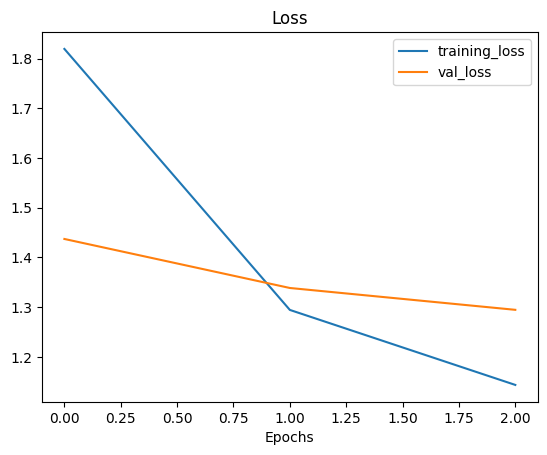

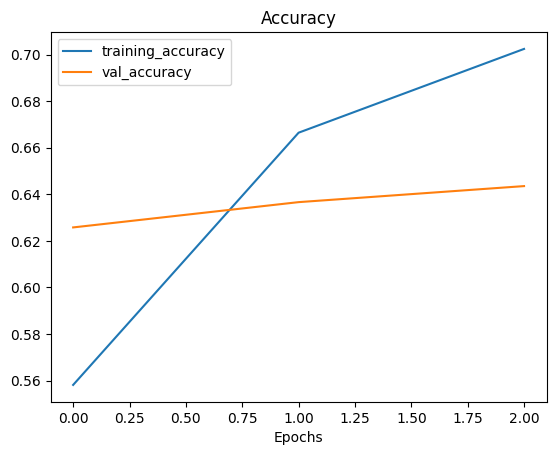

In [ ]:
plot_loss_curves(efficientnetb4_history1)

### Salvando o modelo

In [ ]:
efficientnetb0.save('/content/drive/MyDrive/projeto_geladeira/modelos_final/efficientnetb0_1')
efficientnetb0.save('/content/drive/MyDrive/projeto_geladeira/modelos_final/efficientnetb0_1.h5')

### Carregando o modelo

In [ ]:
efficientnetb0_1 = tf.keras.models.load_model('/content/drive/MyDrive/projeto_geladeira/modelos_final/efficientnetb0_1')

## Fine-Tuning

In [ ]:
efficientnetb0_1.layers

In [ ]:
for layer in efficientnetb0_1.layers:
  print(layer.trainable)

True
False
True
True
True


In [ ]:
for layer in efficientnetb0_1.layers:
  layer.trainable = True
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 True float32 <Policy "mixed_float16">
global_average_pooling2d_1 True float32 <Policy "mixed_float16">
dense_1 True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [ ]:
print(len(efficientnetb0_1.layers[1].trainable_variables))

211


In [ ]:
model_path = '/content/drive/MyDrive/projeto_geladeira/efficientnetb0_2/cp.ckpt'
model_tensorboard_path = '/content/drive/MyDrive/projeto_geladeira/training_logs'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path,
                                                      monitor='val_acc',
                                                      save_best_only=False,
                                                      save_weights_only=True,
                                                      verbose=0)

In [ ]:
efficientnetb0_1.compile(loss='categorical_crossentropy',
                       optimizer=tf.keras.optimizers.Adam(0.0001),
                       metrics=['accuracy'])

In [ ]:
efficientnetb0_history2 = efficientnetb0_1.fit(train_data,
                                           epochs=100,
                                           validation_data=test_data,
                                           #initial_epoch=efficientnetb4_history1.epoch[-1],
                                           validation_steps=int(0.15 * len(test_data)),
                                           callbacks=[create_tensorboard_callback(dir_name=model_tensorboard_path,
                                                                                  experiment_name='efficientnetb0_2'),
                                                      model_checkpoint,
                                                      reduce_lr,
                                                      early_stopping])

Saving TensorBoard log files to: /content/drive/MyDrive/projeto_geladeira/training_logs/efficientnetb0_2/20230614-153538
Epoch 1/100
2368/2368 [==============================] - 402s 159ms/step - loss: 0.9239 - accuracy: 0.7514 - val_loss: 0.9684 - val_accuracy: 0.7285 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - 358s 151ms/step - loss: 0.5606 - accuracy: 0.8471 - val_loss: 0.9800 - val_accuracy: 0.7458 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - ETA: 0s - loss: 0.2968 - accuracy: 0.9179
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 [==============================] - 358s 151ms/step - loss: 0.2968 - accuracy: 0.9179 - val_loss: 1.0336 - val_accuracy: 0.7495 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - 357s 151ms/step - loss: 0.0939 - accuracy: 0.9751 - val_loss: 1.1712 - val_accuracy: 0.7519 - lr: 2.0000e-05


In [ ]:
results_efficientnet_2 = efficientnetb0_1.evaluate(test_data)

790/790 [==============================] - 71s 90ms/step - loss: 0.9805 - accuracy: 0.7909


### Comparando as curvas de treino

In [ ]:
compare_historys(original_history=efficientnetb0_history1, # era pra ser efficientnetb0_history1 ):
                 new_history=efficientnetb0_history2,
                 initial_epochs=5)

NameError: ignored

### Salvando o modelo

In [ ]:
efficientnetb0_1.save('/content/drive/MyDrive/projeto_geladeira/modelos_final/efficientnetb0_2')
efficientnetb0_1.save('/content/drive/MyDrive/projeto_geladeira/modelos_final/efficientnetb0_2.h5')

## Carregando os pesos salvos (para não precisar treinar novamente)

In [ ]:
import tensorflow

efficientnetb0_2 = tf.keras.models.load_model('/content/drive/MyDrive/projeto_geladeira/modelos_final/efficientnetb0_2')
efficientnetb0_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 4,136,929
Non-tra

### Avaliando o modelo carregado

In [ ]:
results_efficientnet_2 = efficientnetb0_2.evaluate(test_data)

790/790 [==============================] - 73s 81ms/step - loss: 0.9805 - accuracy: 0.7909


## Relizando análises nas predições

In [ ]:
pred_probs = efficientnetb0_2.predict(test_data, verbose=1)

790/790 [==============================] - 63s 77ms/step


In [ ]:
len(pred_probs)

25250

In [ ]:
pred_probs.shape

(25250, 101)

In [ ]:
pred_probs[:10]

array([[1.71470433e-03, 5.90099489e-06, 1.66194851e-03, ...,
        1.04755188e-07, 5.25949908e-05, 4.99007409e-04],
       [9.98615026e-01, 4.32497510e-10, 7.07941308e-06, ...,
        9.65608706e-07, 4.78011032e-07, 1.24434747e-08],
       [6.73690438e-01, 1.02387421e-09, 3.07790153e-02, ...,
        1.06690159e-08, 1.15845648e-06, 1.18842445e-05],
       ...,
       [8.38739693e-01, 1.04855280e-09, 4.52196000e-05, ...,
        1.74599712e-08, 1.32151041e-03, 5.18290562e-07],
       [5.23114681e-01, 3.90738569e-06, 1.72504932e-01, ...,
        5.92412762e-05, 9.17546859e-05, 5.59707132e-06],
       [5.73406403e-04, 2.09524301e-10, 1.95709160e-09, ...,
        8.82130202e-10, 2.79164105e-11, 1.41260683e-08]], dtype=float32)

In [ ]:
print(f"Numero de probabilidades de predição para a amostra 0: {len(pred_probs[0])}")
print(f"O vetor de probabilidade se parece com:\n {pred_probs[0]}")
print(f"A classe com a maior probabilidade para a amostra 0: {pred_probs[0].argmax()}")

Numero de probabilidades de predição para a amostra 0: 101
O vetor de probabilidade se parece com:
 [1.71470433e-03 5.90099489e-06 1.66194851e-03 6.84118762e-10
 1.51550091e-06 3.57913427e-06 4.50546516e-08 5.49704837e-10
 7.26051512e-04 3.57913427e-06 7.42825605e-08 1.11511334e-07
 3.09190036e-05 4.37342489e-11 4.00963705e-04 7.26051512e-04
 6.41703423e-07 5.54347116e-06 1.40751508e-04 4.74158287e-06
 3.30517883e-03 3.09655768e-08 4.01567718e-07 1.42968012e-04
 5.01864924e-05 2.70167220e-06 6.64862964e-05 6.38049687e-06
 2.49863820e-06 1.47728500e-07 3.33412881e-10 8.72110468e-06
 1.19705661e-03 2.61855052e-06 4.96913572e-06 6.38049687e-06
 7.85048876e-04 1.62248043e-07 4.88473848e-03 1.37202242e-05
 1.46666437e-03 6.25521892e-08 3.48888079e-07 1.72712134e-07
 2.12502982e-05 1.66194851e-03 7.30209213e-05 3.15857483e-06
 1.25112249e-08 9.03585751e-04 3.95341999e-07 5.31990850e-07
 1.08372644e-02 8.00771564e-02 1.93777652e-08 1.58584234e-03
 1.44392590e-03 2.35714411e-04 4.66104969e-03 

In [ ]:
pred_probs[0].sum()

1.0

In [ ]:
pred_classes = pred_probs.argmax(axis=1)

pred_classes[:5]

array([85,  0,  0,  0,  0])

In [ ]:
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

y_labels[:5]

[0, 0, 0, 0, 0]

In [ ]:
len(y_labels)

25250

In [ ]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.790930693069307

In [ ]:
from helper_functions import make_confusion_matrix

make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

In [ ]:
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

In [ ]:
class_f1_scores = {}

for k, v in classification_report_dict.items():
  if k == 'accuracy':
    break
  else:
    class_f1_scores[class_names[int(k)]] = v['f1-score']

class_f1_scores

In [ ]:
import pandas as pd
f1_scores = pd.DataFrame({'class_name' : list(class_f1_scores.keys()),
                          'f1-score' : list(class_f1_scores.values())}).sort_values('f1-score', ascending=False)

f1_scores.head(5)

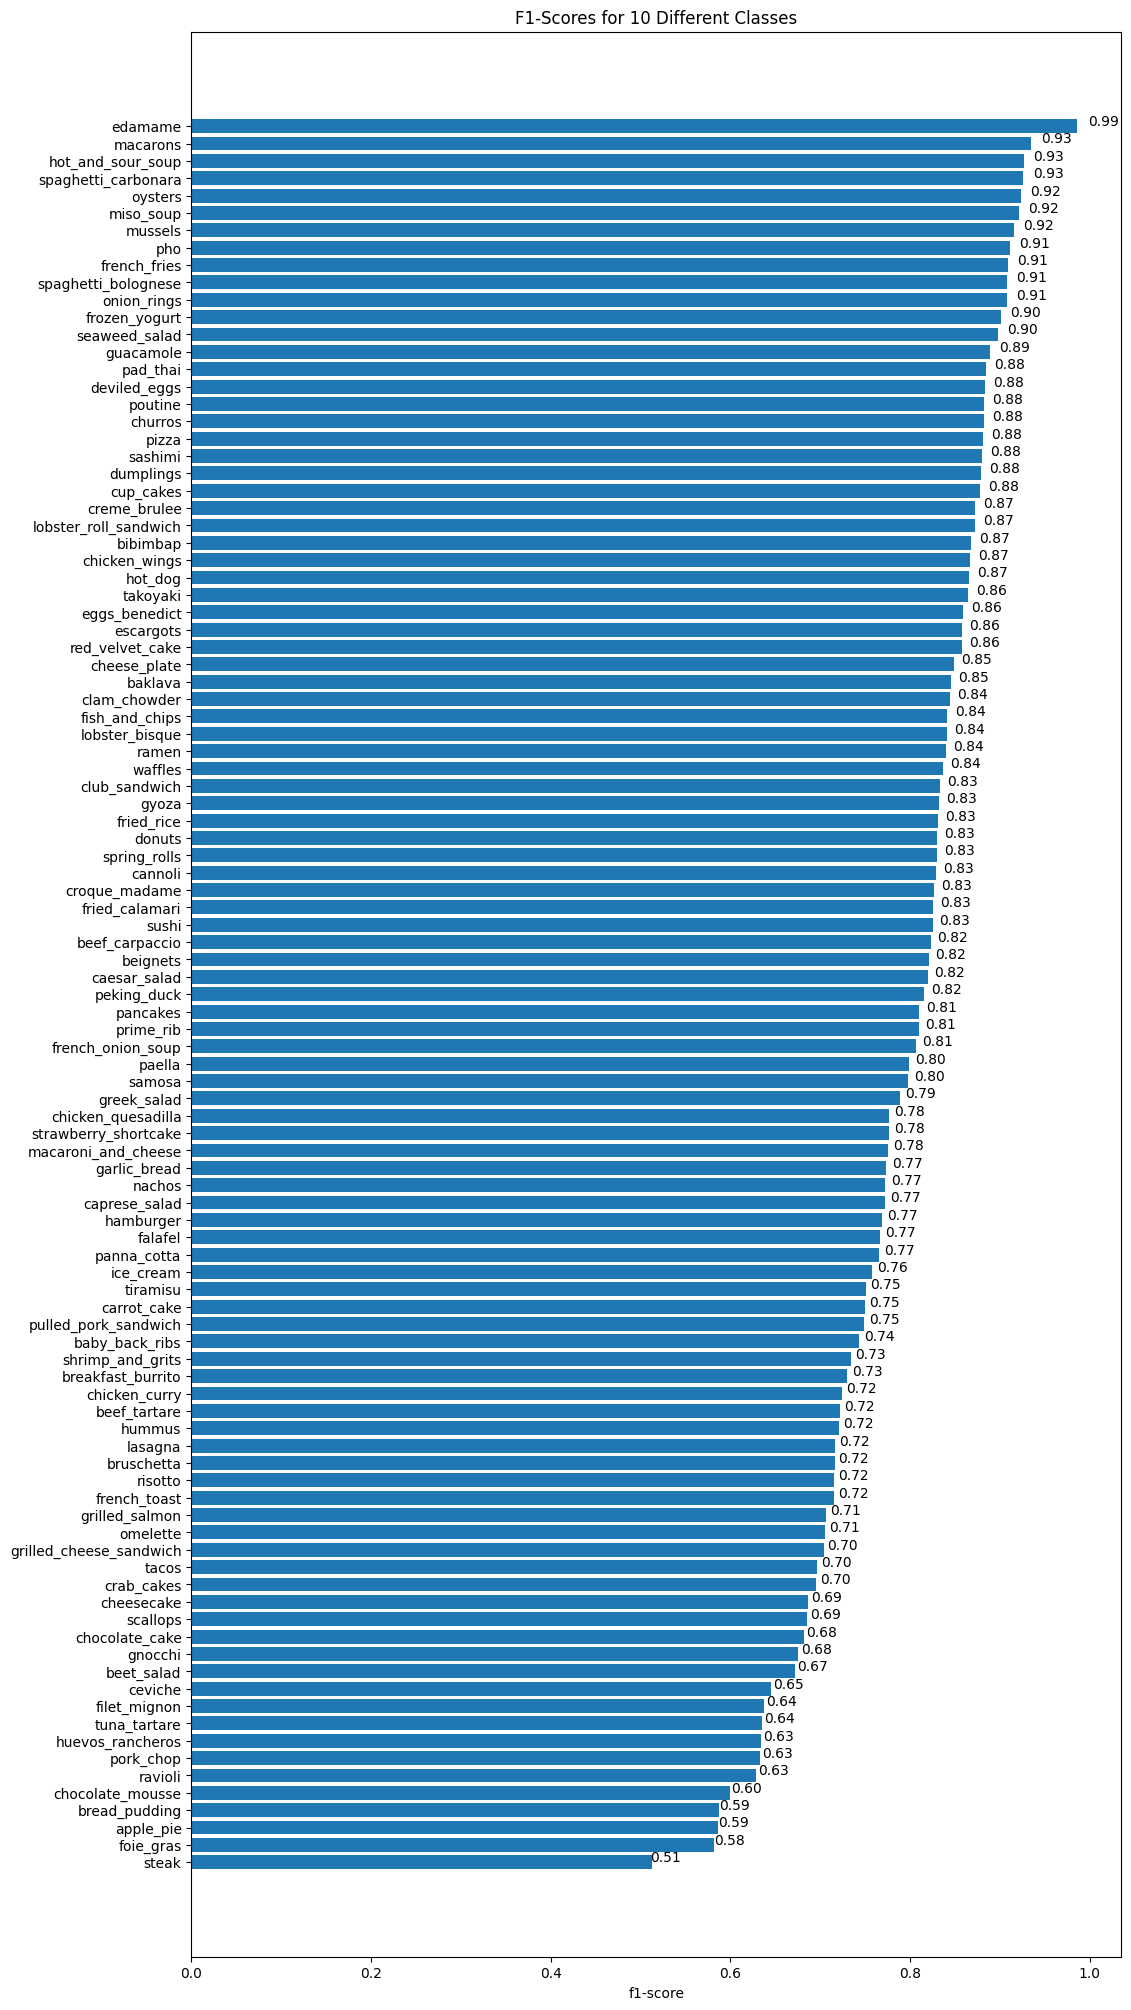

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis()

def autolabel(rects):
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

In [ ]:
import random
from helper_functions import load_and_prep_image
import os

plt.figure(figsize=(25, 15))

for i in range(10):
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + '/' + class_name + "/" + filename

  img = load_and_prep_image(filepath, scale=False)
  pred_prob = efficientnetb0_2.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]

  plt.subplot(1, 10, i + 1)
  plt.imshow(img/255.)
  if class_name == pred_class:
    title_color = 'g'
  else:
    title_color = 'r'

  plt.title(f"Atual: {class_name}, \nPred: {pred_class}, \nProb: {pred_prob.max():.2f}",
            c=title_color)
  plt.axis(False)

## Analisando os maiores erros nas predições

In [ ]:
filepaths = []
for filepath in test_data.list_files('food101/test/*/*.jpg',
                                     shuffle=False):
  filepaths.append(filepath.numpy())

filepaths[:5]

[b'food101/test/apple_pie/1011328.jpg',
 b'food101/test/apple_pie/101251.jpg',
 b'food101/test/apple_pie/1034399.jpg',
 b'food101/test/apple_pie/103801.jpg',
 b'food101/test/apple_pie/1038694.jpg']

In [ ]:
import pandas as pd
pred_df = pd.DataFrame({
    'img_path': filepaths,
    'y_true': y_labels,
    'y_pred': pred_classes,
    'pred_conf': pred_probs.max(axis=1),
    'y_true_classname': [class_names[i] for i in y_labels],
    'y_pred_classname': [class_names[i] for i in pred_classes]
})

In [ ]:
pred_df.head(5)

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname
0,b'food101/test/apple_pie/1011328.jpg',0,85,0.847563,apple_pie,samosa
1,b'food101/test/apple_pie/101251.jpg',0,0,0.998615,apple_pie,apple_pie
2,b'food101/test/apple_pie/1034399.jpg',0,0,0.673690,apple_pie,apple_pie
3,b'food101/test/apple_pie/103801.jpg',0,0,0.972680,apple_pie,apple_pie
4,b'food101/test/apple_pie/1038694.jpg',0,0,0.954491,apple_pie,apple_pie


In [ ]:
pred_df['pred_correct'] = pred_df['y_true'] == pred_df['y_pred']

In [ ]:
pred_df.head(5)

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,b'food101/test/apple_pie/1011328.jpg',0,85,0.847563,apple_pie,samosa,False
1,b'food101/test/apple_pie/101251.jpg',0,0,0.998615,apple_pie,apple_pie,True
2,b'food101/test/apple_pie/1034399.jpg',0,0,0.673690,apple_pie,apple_pie,True
3,b'food101/test/apple_pie/103801.jpg',0,0,0.972680,apple_pie,apple_pie,True
4,b'food101/test/apple_pie/1038694.jpg',0,0,0.954491,apple_pie,apple_pie,True


In [ ]:
top_100_df = pred_df[pred_df['pred_correct'] == False].sort_values('pred_conf', ascending=False)[:100]

In [ ]:
top_100_df.head(10)

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
11642,b'food101/test/garlic_bread/2957596.jpg',46,10,1.000000,garlic_bread,bruschetta,False
21978,b'food101/test/scallops/751617.jpg',87,30,1.000000,scallops,deviled_eggs,False
16271,b'food101/test/mussels/1407674.jpg',65,69,1.000000,mussels,oysters,False
14035,b'food101/test/huevos_rancheros/1510794.jpg',56,66,1.000000,huevos_rancheros,nachos,False
2046,b'food101/test/bread_pudding/1548953.jpg',8,41,0.999999,bread_pudding,french_onion_soup,False
16151,b'food101/test/miso_soup/312662.jpg',64,54,0.999998,miso_soup,hot_and_sour_soup,False
9051,b'food101/test/falafel/1692987.jpg',36,26,0.999997,falafel,crab_cakes,False
3165,b'food101/test/cannoli/340299.jpg',12,13,0.999997,cannoli,caprese_salad,False
9416,b'food101/test/filet_mignon/3165594.jpg',37,21,0.999996,filet_mignon,chocolate_cake,False
5299,b'food101/test/chocolate_cake/1864488.jpg',21,83,0.999995,chocolate_cake,red_velvet_cake,False


31


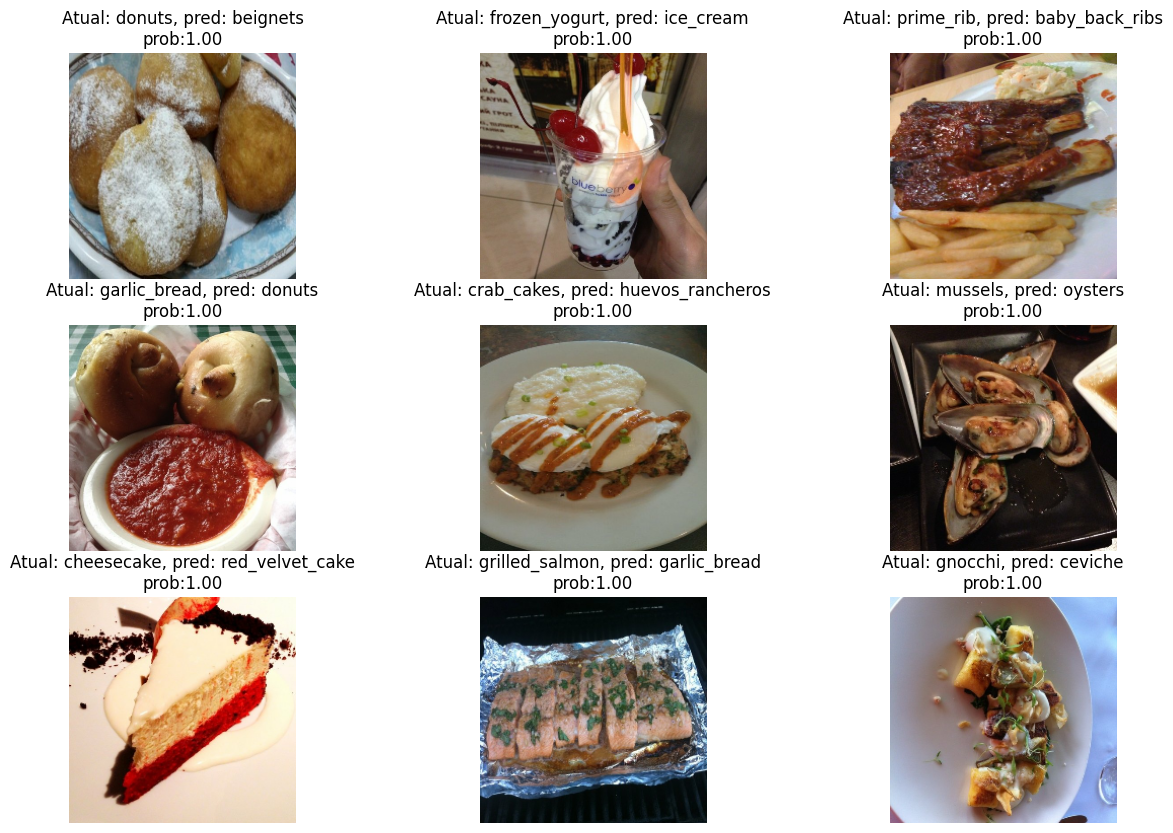

In [ ]:
images_to_view = 9
random_start = random.randint(0, 100)
print(random_start)
start_index = random_start
plt.figure(figsize=(15, 10))

for i, row in enumerate(top_100_df[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3, 3, i + 1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row
  plt.imshow(img)
  plt.title(f'Atual: {y_true}, pred: {y_pred}\nprob:{pred_prob:.2f}')
  plt.axis(False)